In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Kaggle Datasets\Credit Card Spending in India.csv")

In [3]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0.0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475.0
1,1.0,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555.0
2,2.0,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738.0
3,3.0,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424.0
4,4.0,"Bengaluru, India",5-May-15,Gold,Bills,F,171574.0


In [4]:
df.tail()

,index,City,Date,Card Type,Exp Type,Gender,Amount
26047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26051,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      101 non-null    float64
 1   City       101 non-null    object 
 2   Date       101 non-null    object 
 3   Card Type  101 non-null    object 
 4   Exp Type   101 non-null    object 
 5   Gender     101 non-null    object 
 6   Amount     101 non-null    float64
dtypes: float64(2), object(5)
memory usage: 1.4+ MB


In [6]:
df.shape

(26052, 7)

In [7]:
df.columns

Index(['index', 'City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')

In [8]:
df[df.duplicated()]

,index,City,Date,Card Type,Exp Type,Gender,Amount
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
26047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26050,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

index        25951
City         25951
Date         25951
Card Type    25951
Exp Type     25951
Gender       25951
Amount       25951
dtype: int64

In [10]:
# removing null values
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

In [12]:
# checking and removing duplicates
df[df.duplicated()]

,index,City,Date,Card Type,Exp Type,Gender,Amount


In [13]:
# droping index column
df.drop(columns="index",inplace=True)

In [14]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475.0
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555.0
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738.0
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424.0
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574.0


In [15]:
# converting date to date time and removing the date column
df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [16]:
df.drop(columns="Date",inplace=True)

In [17]:
df.head()

,City,Card Type,Exp Type,Gender,Amount,Day,Month,Year
0,"Delhi, India",Gold,Bills,F,82475.0,29,10,2014
1,"Greater Mumbai, India",Platinum,Bills,F,32555.0,22,8,2014
2,"Bengaluru, India",Silver,Bills,F,101738.0,27,8,2014
3,"Greater Mumbai, India",Signature,Bills,F,123424.0,12,4,2014
4,"Bengaluru, India",Gold,Bills,F,171574.0,5,5,2015


In [18]:
# visualization
df.head()

,City,Card Type,Exp Type,Gender,Amount,Day,Month,Year
0,"Delhi, India",Gold,Bills,F,82475.0,29,10,2014
1,"Greater Mumbai, India",Platinum,Bills,F,32555.0,22,8,2014
2,"Bengaluru, India",Silver,Bills,F,101738.0,27,8,2014
3,"Greater Mumbai, India",Signature,Bills,F,123424.0,12,4,2014
4,"Bengaluru, India",Gold,Bills,F,171574.0,5,5,2015


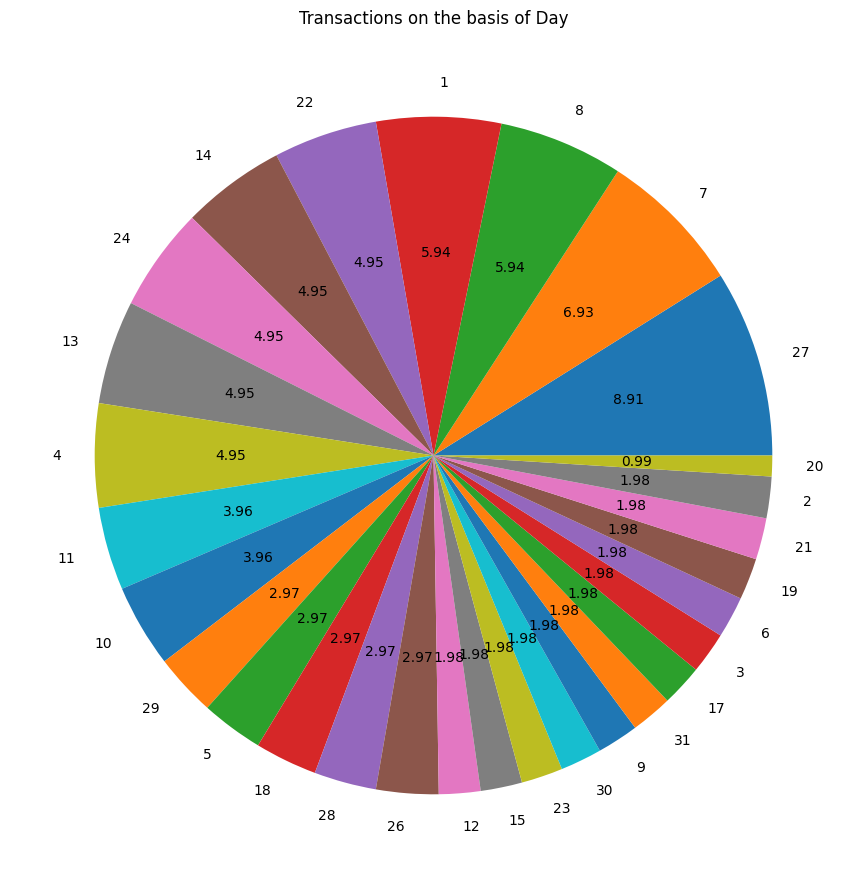

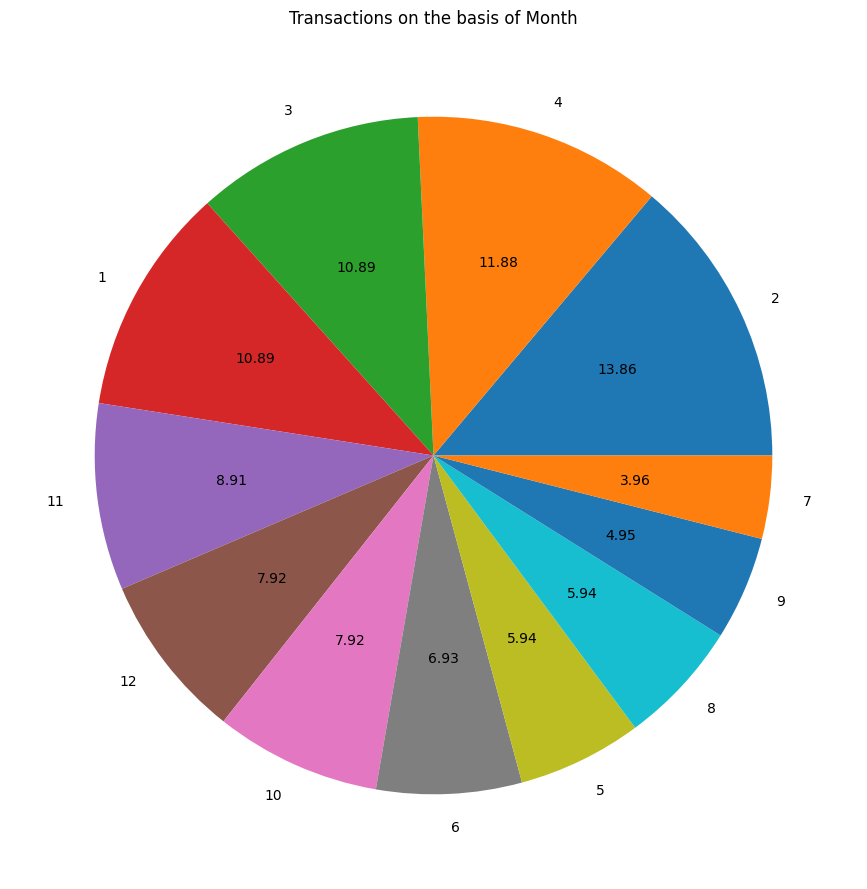

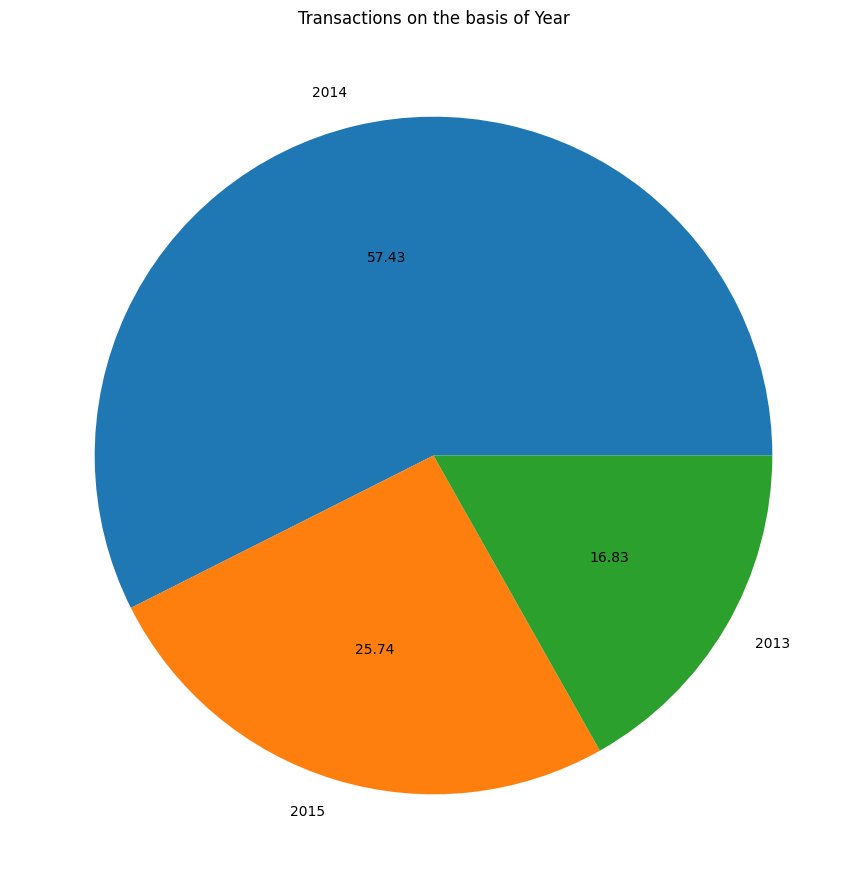

In [19]:
# daily transactions
for item in df.columns:
    if item == "Day" or item == "Month" or item == "Year":
        transaction = df[item].value_counts()
        percentage = (df[item].value_counts()/df[item].value_counts().sum())*100
        plt.figure(figsize=(11,11))
        plt.title(f"Transactions on the basis of {item}")
        plt.pie(data=df,x=percentage,autopct="%1.2f",labels=transaction.index)
        plt.show()

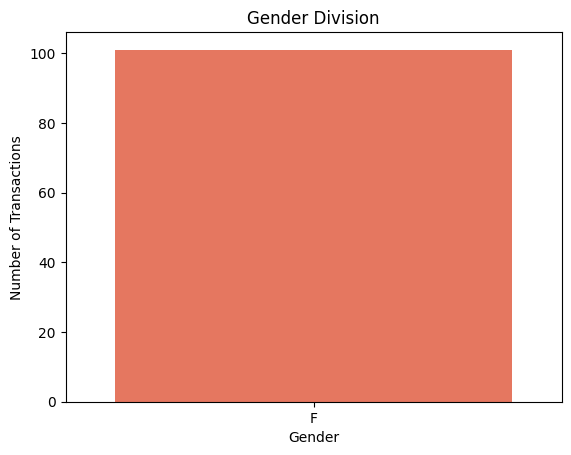

In [20]:
# gender divison
gender = df["Gender"].value_counts()
plt.title("Gender Division")
sns.barplot(data=gender,palette="Reds")
plt.xlabel("Gender")
plt.ylabel("Number of Transactions")
plt.show()

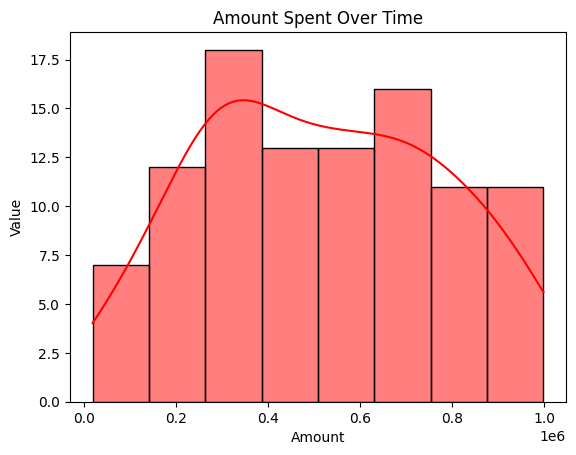

In [21]:
# amount spent over time
plt.title("Amount Spent Over Time")
sns.histplot(data=df,x=df["Amount"],kde=True,color="red")
plt.ylabel("Value")
plt.show()

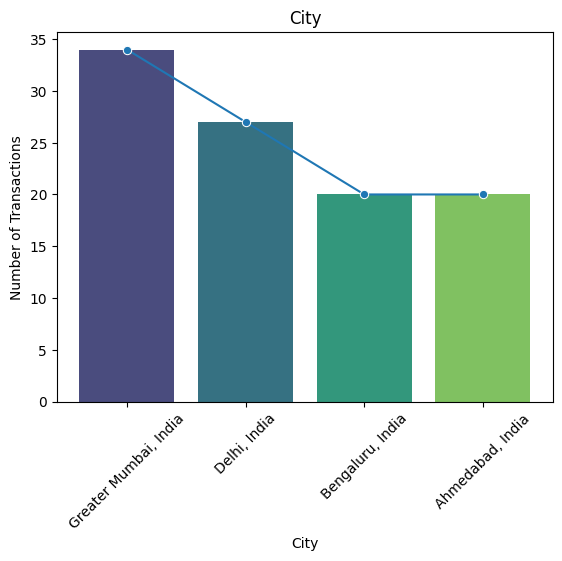

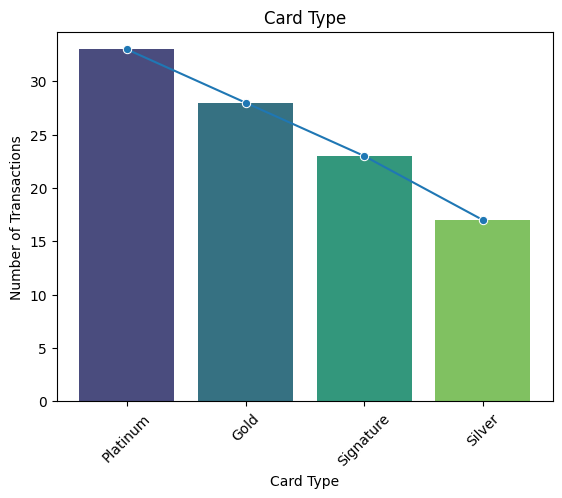

In [22]:
# major card types and cities
for item in df.columns:
    if item == "Card Type" or item == "City":
        info = df[item].value_counts()
        plt.title(f"{item}")
        sns.barplot(data=info,palette="viridis")
        sns.lineplot(data=info,marker="o")
        plt.xlabel(f"{item}")
        plt.xticks(rotation=45)
        plt.ylabel("Number of Transactions")
        plt.show()

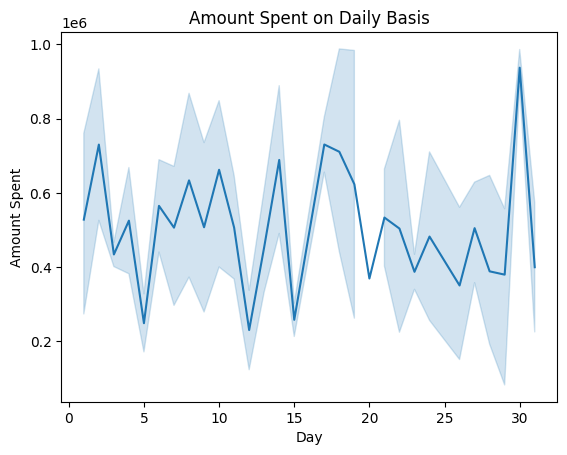

In [23]:
# transaction amount analysis:
# daily basis
plt.title("Amount Spent on Daily Basis")
sns.lineplot(data=df,x=df["Day"],y=df["Amount"])
plt.xlabel("Day")
plt.ylabel("Amount Spent")
plt.show()

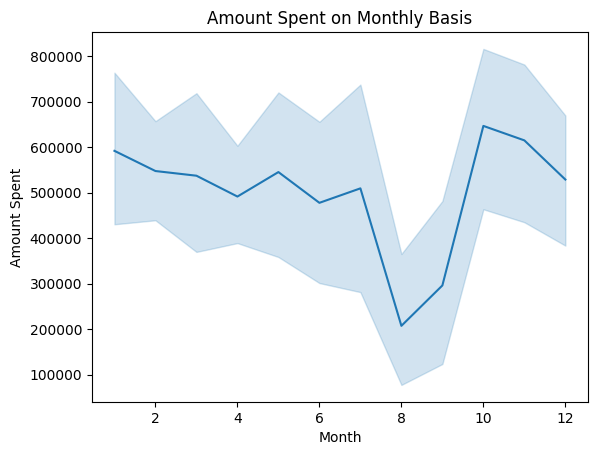

In [24]:
# monthly basis
plt.title("Amount Spent on Monthly Basis")
sns.lineplot(data=df,x=df["Month"],y=df["Amount"])
plt.xlabel("Month")
plt.ylabel("Amount Spent")
plt.show()

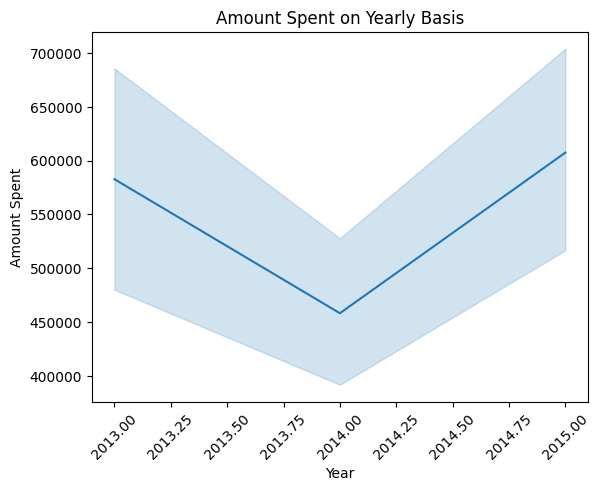

In [25]:
# yearly basis
plt.title("Amount Spent on Yearly Basis")
sns.lineplot(data=df,x=df["Year"],y=df["Amount"])
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Amount Spent")
plt.show()

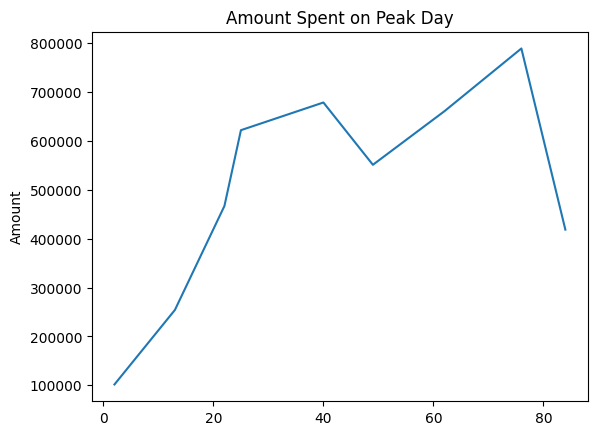

In [53]:
# amount spent on peak day
day = df[df["Day"]==27]
plt.title("Amount Spent on Peak Day")
sns.lineplot(data=day["Amount"])
plt.show()

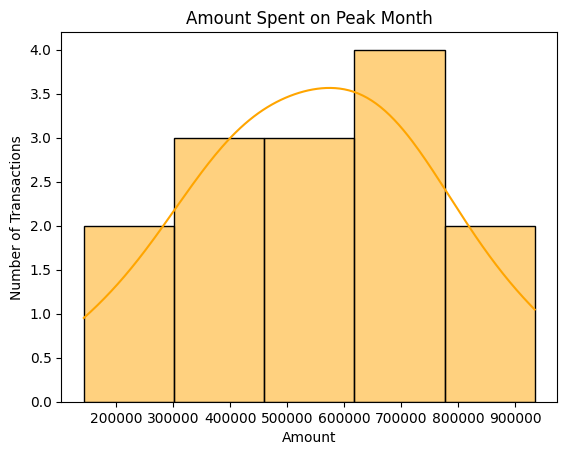

In [27]:
# amount spent on peak month
month = df[df["Month"]==2]
plt.title("Amount Spent on Peak Month")
sns.histplot(data=month,x=month["Amount"],kde=True,color="orange")
plt.ylabel("Number of Transactions")
plt.show()

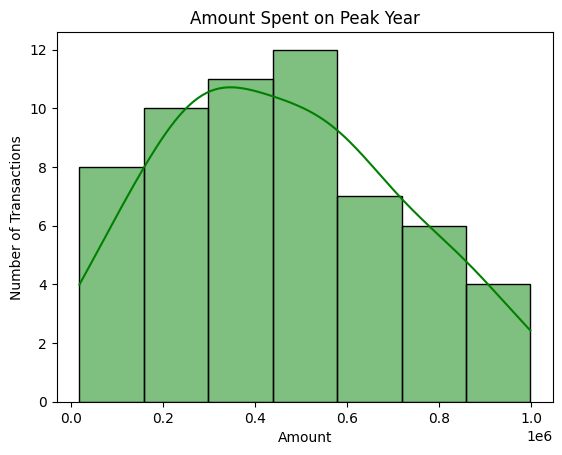

In [28]:
# amount spent on peak year
year = df[df["Year"]==2014]
plt.title("Amount Spent on Peak Year")
sns.histplot(data=year,x=year["Amount"],kde=True,color="green")
plt.ylabel("Number of Transactions")
plt.show()

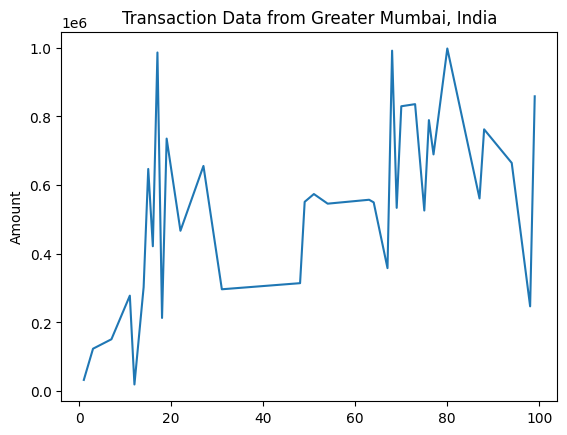

In [52]:
# amount spent in different cities
# Greater Mumbai, India
trans_data = df[df["City"]=="Greater Mumbai, India"]
plt.title("Transaction Data from Greater Mumbai, India")
sns.lineplot(data=trans_data["Amount"])
plt.show()

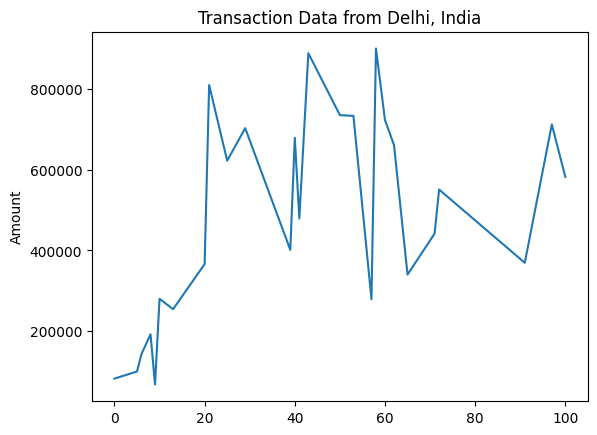

In [51]:
# Delhi, India
trans_data = df[df["City"]=="Delhi, India"]
plt.title("Transaction Data from Delhi, India")
sns.lineplot(data=trans_data["Amount"])
plt.show()

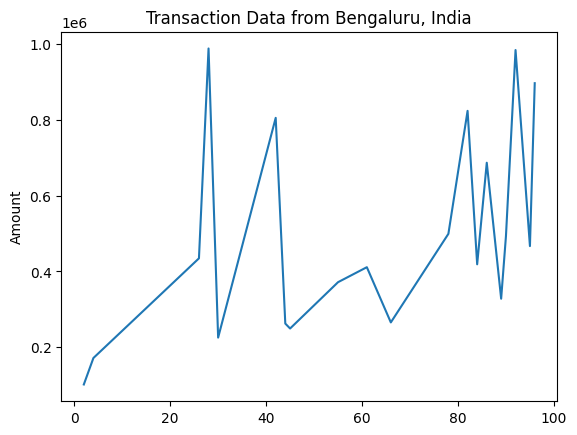

In [48]:
# Bengaluru, India
trans_data = df[df["City"]=="Bengaluru, India"]
plt.title("Transaction Data from Bengaluru, India")
sns.lineplot(data=trans_data['Amount'])
plt.show()

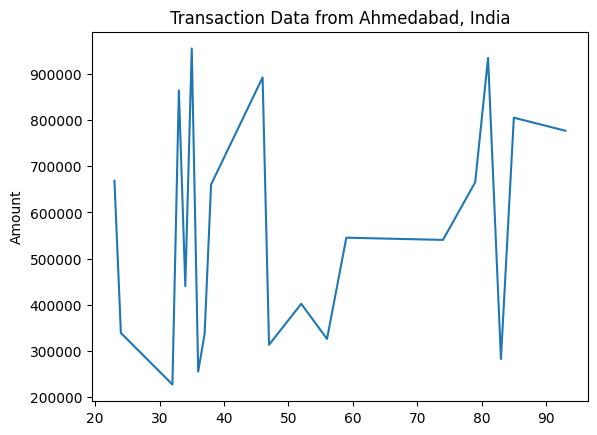

In [46]:
# Ahmedabad, India
trans_data = df[df["City"]=="Ahmedabad, India"]
plt.title("Transaction Data from Ahmedabad, India")
sns.lineplot(data=trans_data['Amount'])
plt.show()